# MDS（多维缩放）
核心：降维后，样本距离保持不变

假定m个样本在原始空间的距离矩阵为 $D \in R^{m×m}$，$i$行$j$列的元素$dist_{ij}$为样本$i$到$j$的距离。样本在${d}'$维空间的表示$z \in R^{{d}'×m},{d}' \leqslant d$，且任意2个样本在${d}'$维空间中的欧式距离等于原空间中的距离，即$||z_i - z_j||=dist_{ij}$

令$B=Z^TZ \in \mathbb{R}^{m \times m}$,为降维后内积矩阵，$b_{ij}=z_i^Tz_j$，有：
$$
dist_{ij}^2 = ||z_i - z_j||^2 = ||z_i||^2 + ||z_j||^2 - 2z_i^2z_j = b_{ii} + b_{jj} - 2b_{ij}
$$
对z被中心化（即：$z_i = \frac{z_i - \mu}{\sigma} ,\sum_{i=1}^{m}z_i=0$）,根据矩阵乘法，则矩阵$B$的行，列之和都是0.即$,\sum_{i=1}^{m}b_{ij} = ,\sum_{j=1}^{m}b_{ij}=0$,同时，借助矩阵迹（trace，$tr(B) = ,\sum_{i=1}^{m}||z_i||^2$，对角线元素平方和），可以推导出：
$$
b_{ij} = -\frac{1}{2}(dist_{ij}^2 - dist_{i}^2 - dist_{.j}^2 + dist_{..}^2)
$$
由此可以根据原特征距离，去计算矩阵$B$，而后对矩阵$B$做特征值分解。取前${d}'$个

核心是：距离保持不变

评估：实际效果提升

# PCA
推导核心：最大化投影空间的方差

1）$\frac{1}{m}XX^T$是协方差矩阵（实际应该是$\frac{1}{m-1}$，但是样本量大，可以忽略，二协方差矩阵是个对称矩阵，（特点：实对称矩阵对应特征向量必然正交。因为特征向量可以多个，将其标准化，及$||e_i||=1$）

2）$n \times n$的实对称矩阵一定有n个单位特征向量($e_1,e_2,...,e_n$)，令其组成矩阵$E=(e_1,e_2,...,e_n)$,则

$E^TCE=\begin{bmatrix}
\lambda_1 &  &  & \\ 
 & \lambda_2 &  & \\ 
 &  & \ddots  & \\ 
 &  &  & \lambda_n
\end{bmatrix}$

仅仅只需要求出$C$的特征值与特征向量。按照从大到小排列，再$P*X$就是映射后的数据

SVD分求特征值，可以参考：https://www.cnblogs.com/pinard/p/6251584.html

可以选择PCA,IncrementalPCA

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

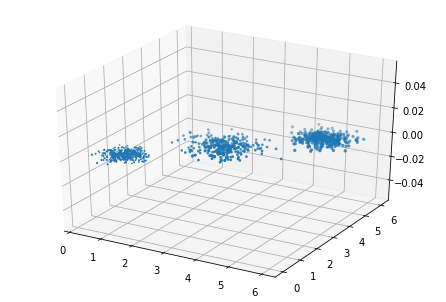

In [75]:
# 生成聚类数据
X, y = make_blobs(n_samples=1000, n_features=3, centers=[[5, 5, 5], [1,1,1], [3,3,3]], cluster_std=[0.4, 0.3, 0.5], 
                  random_state =10)
fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')
plt.show()

In [78]:
# 模型拟合：统计方差，均值等特征
pca_model = PCA(n_components=2)
pca_model.fit(X)
print(pca_model.explained_variance_ratio_, pca_model.explained_variance_)

[0.960795   0.02019402] [8.15686766 0.17144132]


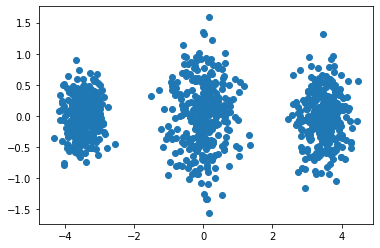

In [79]:
# 降维
trans_x = pca_model.transform(X)
plt.scatter(trans_x[:, 0], trans_x[:, 1],marker='o')
plt.show()